In [1]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [2]:
import sys
print(sys.version)
print(keras.__version__)
print(tf.__version__)

3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
2.2.5
1.15.0-rc3


In [0]:
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
#config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

** More on autoencoders in Keras **

[Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)

[Автоэнкодеры в Keras, Части 1-6](https://habrahabr.ru/post/331382/)

### MNIST data

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### FNN autoencoder

In [6]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.3681 - val_loss: 0.2718
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2647 - val_loss: 0.2541
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2446 - val_loss: 0.2335
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2264 - val_loss: 0.2167
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2114 - val_loss: 0.2036
Epoch 6/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2002 - val_loss: 0.1940
Epoch 7/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1915 - val_loss: 0.1862
Epoch 8/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1841 - val_loss: 0.1793
Epoch 9/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1777 - val_loss: 0.1733
Epoch

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

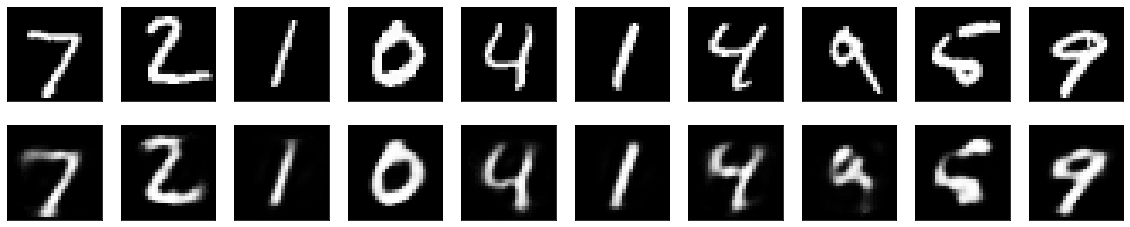

In [15]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
score = autoencoder.evaluate(x_test, x_test)

10000/10000 [==============================] - 0s 49us/step


In [17]:
score

0.10232945424318314

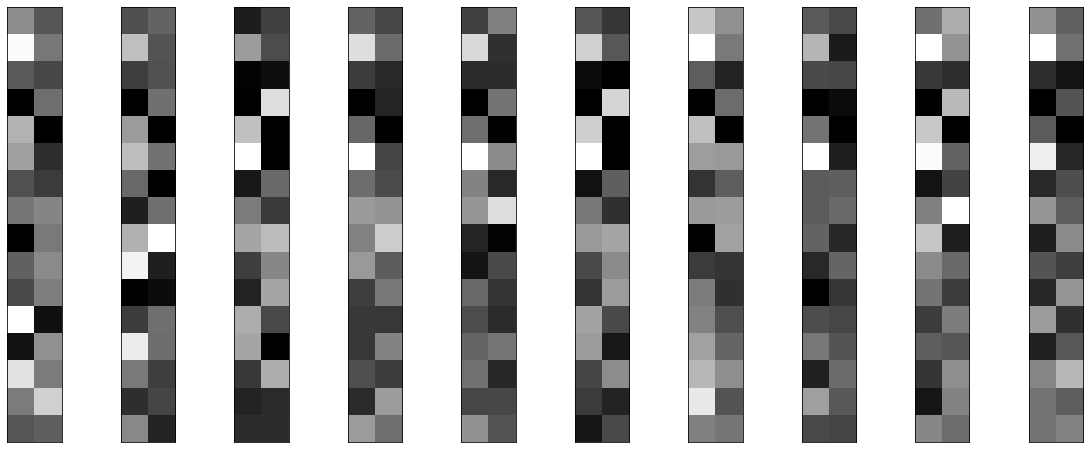

In [19]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(2, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep FNN autoencoder

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [21]:
deep_autoencoder = Model(input_img, decoded)
deep_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

deep_autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.3486 - val_loss: 0.2638
Epoch 2/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.2585 - val_loss: 0.2539
Epoch 3/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.2448 - val_loss: 0.2328
Epoch 4/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.2277 - val_loss: 0.2228
Epoch 5/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.2170 - val_loss: 0.2079
Epoch 6/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.2050 - val_loss: 0.1984
Epoch 7/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1972 - val_loss: 0.1936
Epoch 8/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1915 - val_loss: 0.1873
Epoch 9/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1845 - val_loss: 0.1

In [0]:
# this model maps an input to its encoded representation
deep_encoder = Model(input_img, encoded)

In [0]:
# create a placeholder for an encoded (32-dimensional) input
deep_encoded_input = Input(shape=(32,))

In [0]:
deep_decoder_layers = deep_autoencoder.layers[-3](deep_encoded_input)
deep_decoder_layers = deep_autoencoder.layers[-2](deep_decoder_layers)
deep_decoder_layers = deep_autoencoder.layers[-1](deep_decoder_layers)
deep_decoder = Model(deep_encoded_input, deep_decoder_layers)

In [0]:
encoded_imgs = deep_encoder.predict(x_test)
decoded_imgs = deep_decoder.predict(encoded_imgs)

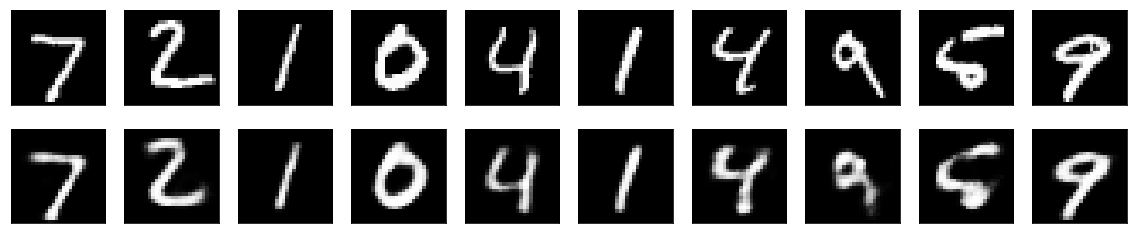

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
score = deep_autoencoder.evaluate(x_test, x_test)

10000/10000 [==============================] - 1s 89us/step


In [0]:
score

0.098426697218418124

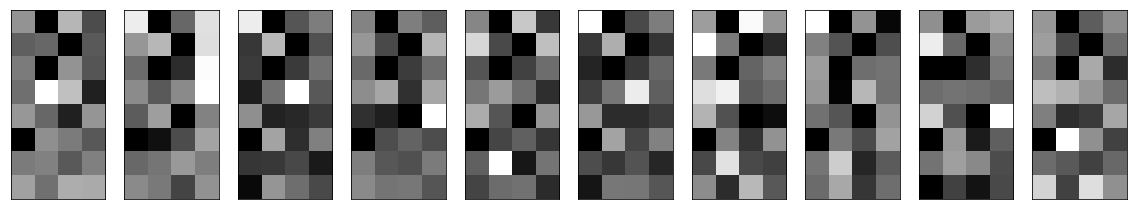

In [0]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep regularized FNN autoencoder

In [0]:
from keras import regularizers

In [22]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-7))(input_img)
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-7))(encoded)
encoded = Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-7))(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

NameError: ignored

In [0]:
deep_autoencoder_l1 = Model(input_img, decoded)
deep_autoencoder_l1.compile(optimizer='adadelta', loss='binary_crossentropy')

deep_autoencoder_l1.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.4875 - val_loss: 0.2727
Epoch 2/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.2633 - val_loss: 0.2579
Epoch 3/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.2567 - val_loss: 0.2556
Epoch 4/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.2549 - val_loss: 0.2542
Epoch 5/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.2537 - val_loss: 0.2531
Epoch 6/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.2527 - val_loss: 0.2521
Epoch 7/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.2518 - val_loss: 0.2515
Epoch 8/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.2509 - val_loss: 0.2503
Epoch 9/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.2499 - val_loss: 0.2

60000/60000 [==============================] - 3s 52us/step - loss: 0.1959 - val_loss: 0.1957
Epoch 78/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.1953 - val_loss: 0.1951
Epoch 79/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1945 - val_loss: 0.1938
Epoch 80/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1939 - val_loss: 0.1934
Epoch 81/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1932 - val_loss: 0.1928
Epoch 82/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1922 - val_loss: 0.1914
Epoch 83/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.1914 - val_loss: 0.1905
Epoch 84/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1904 - val_loss: 0.1891
Epoch 85/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.1893 - val_loss: 0.1881
Epoch 86/100
60000/60000 [========================

In [0]:
# this model maps an input to its encoded representation
deep_encoder_l1 = Model(input_img, encoded)

In [0]:
# create a placeholder for an encoded (32-dimensional) input
deep_encoded_input_l1 = Input(shape=(32,))

In [0]:
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-3](deep_encoded_input_l1)
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-2](deep_decoder_layers_l1)
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-1](deep_decoder_layers_l1)
deep_decoder_l1 = Model(deep_encoded_input_l1, deep_decoder_layers_l1)

In [0]:
encoded_imgs = deep_encoder_l1.predict(x_test)
decoded_imgs = deep_decoder_l1.predict(encoded_imgs)

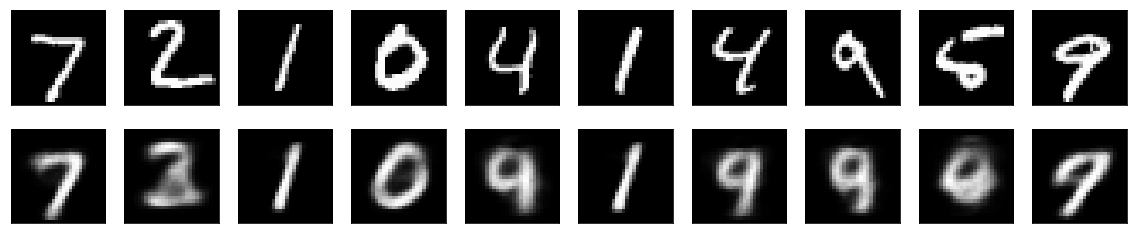

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
score = deep_autoencoder_l1.evaluate(x_test, x_test)

10000/10000 [==============================] - 0s 38us/step


In [0]:
score

0.17606941182613373

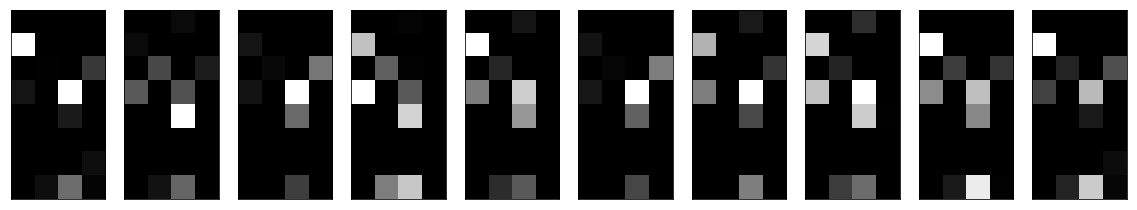

In [0]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Denoising autoencoder

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

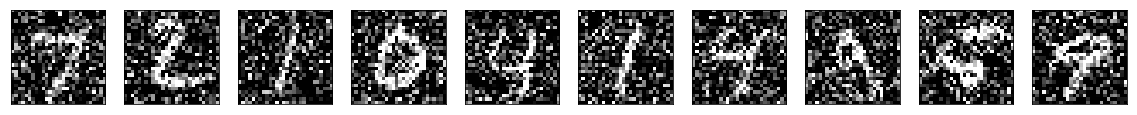

In [0]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
x_train_noisy = x_train.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [0]:
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

denoising_autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.3237 - val_loss: 0.2620
Epoch 2/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.2508 - val_loss: 0.2429
Epoch 3/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.2179 - val_loss: 0.2195
Epoch 4/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1970 - val_loss: 0.2086
Epoch 5/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1820 - val_loss: 0.2198
Epoch 6/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.1719 - val_loss: 0.1998
Epoch 7/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1634 - val_loss: 0.1968
Epoch 8/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1554 - val_loss: 0.2256
Epoch 9/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1497 - val_loss: 0.2

60000/60000 [==============================] - 3s 54us/step - loss: 0.0905 - val_loss: 0.2746
Epoch 78/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0902 - val_loss: 0.2646
Epoch 79/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0901 - val_loss: 0.2651
Epoch 80/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0899 - val_loss: 0.2782
Epoch 81/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0897 - val_loss: 0.2706
Epoch 82/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0896 - val_loss: 0.2488
Epoch 83/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0894 - val_loss: 0.2737
Epoch 84/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0893 - val_loss: 0.2668
Epoch 85/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0891 - val_loss: 0.2539
Epoch 86/100
60000/60000 [========================

In [0]:
denoising_encoder = Model(input_img, encoded)
denoising_input = Input(shape=(32,))
denoising_decoder_layers = denoising_autoencoder.layers[-3](denoising_input)
denoising_decoder_layers = denoising_autoencoder.layers[-2](denoising_decoder_layers)
denoising_decoder_layers = denoising_autoencoder.layers[-1](denoising_decoder_layers)
denoising_decoder = Model(denoising_input, denoising_decoder_layers)

encoded_imgs = denoising_encoder.predict(x_test_noisy)
decoded_imgs = denoising_decoder.predict(encoded_imgs)

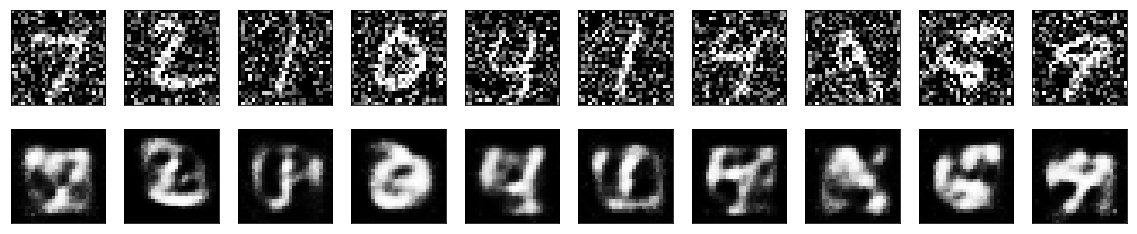

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### What´s next?

* Convolutional autoencoders
* Sequence-to-sequence autoencoder
* Variational autoencoders (VAE)
* GANs